## Spooky EDA

[Spooky Author Competition](https://www.kaggle.com/c/spooky-author-identification)

[Inspiration](https://www.kaggle.com/headsortails/treemap-house-of-horror-spooky-eda-lda-features)


You may need to install wordclould - run 

``` bash 
pip install wordcloud ```

in your terminal 

You could also run 
``` bash 
!pip install wordcloud```

in a jupyter cell but this is not reccomended - bash commands are meant for the terminal, not the notebook. 

---

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import wordcloud
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 99)

%matplotlib inline

In [2]:
df = pd.read_csv('../data/spooky_author.csv')

In [3]:
df.head(7)

,id,text,author
0,id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I ...",EAP
1,id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
2,id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all man...",EAP
3,id27763,How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread b...,MWS
4,id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed...",HPL
5,id22965,"A youth passed in solitude, my best years spent under your gentle and feminine fosterage, has s...",MWS
6,id09674,"The astronomer, perhaps, at this point, took refuge in the suggestion of non luminosity; and he...",EAP


In [4]:
X = df['text']
y = df['author']

df['text'][0]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

### Let's create a wordcloud from Edgar Allen Poe text 

The wordcloud library is looking for raw text as the input

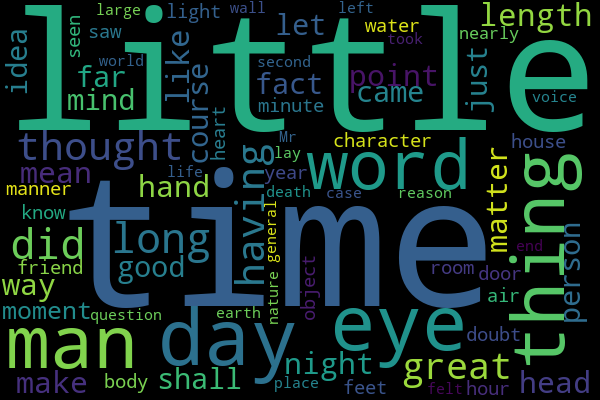

In [5]:
stops = list(ENGLISH_STOP_WORDS) + ['said', 'say']

wc = wordcloud.WordCloud(width=600, height=400, max_words=75\
                    , stopwords=stops)
text = df.loc[df['author'] == 'EAP', 'text'].str.cat()

wc.generate_from_text(text)
wc.to_image()

### Create word clouds from the other two authors 

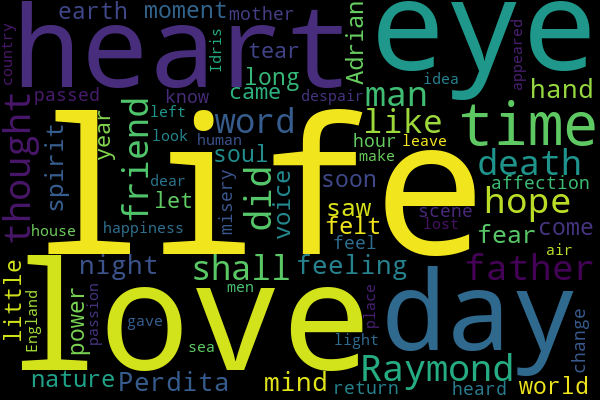

In [6]:
### code 

def word_clouder(author, custom_stops = []):

    stops = list(ENGLISH_STOP_WORDS) + custom_stops

    wc = wordcloud.WordCloud(width=600, height=400, max_words=75\
                        , stopwords=stops)
    text = df.loc[df['author'] == author, 'text'].str.cat()

    wc.generate_from_text(text)
    return wc.to_image()

word_clouder('MWS', ['said']) ### adding said as a stopword

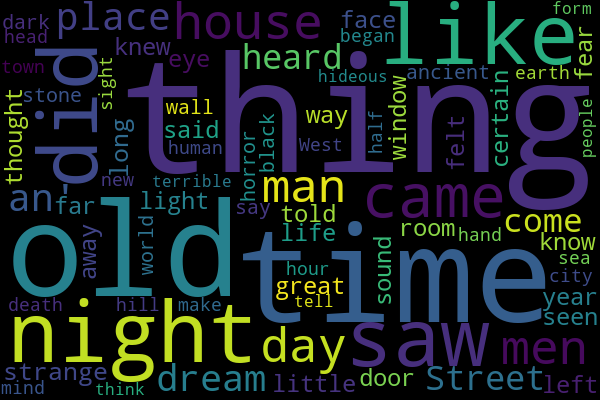

In [7]:
word_clouder('HPL')

### Use count vectorizer to quantify the text and store it in a Pandas Data Frame

In [8]:
custom_stop = list(ENGLISH_STOP_WORDS)

cv = CountVectorizer(stop_words=custom_stop, min_df=6)

vect_df = pd.DataFrame(cv.fit_transform(df['text']).todense(), columns= \
                      cv.get_feature_names())

### Make sub dataframes  for each author 


In [9]:
eap_df = vect_df[df['author'] =='EAP']
mws_df = vect_df[df['author'] == 'MWS']
hpl_df = vect_df[df['author'] == 'HPL']

### What are the most frequent words?

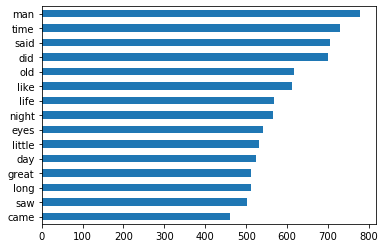

In [10]:
vect_df.sum().sort_values().tail(15).plot.barh();

### Top 20 most frequent words broken down by author  

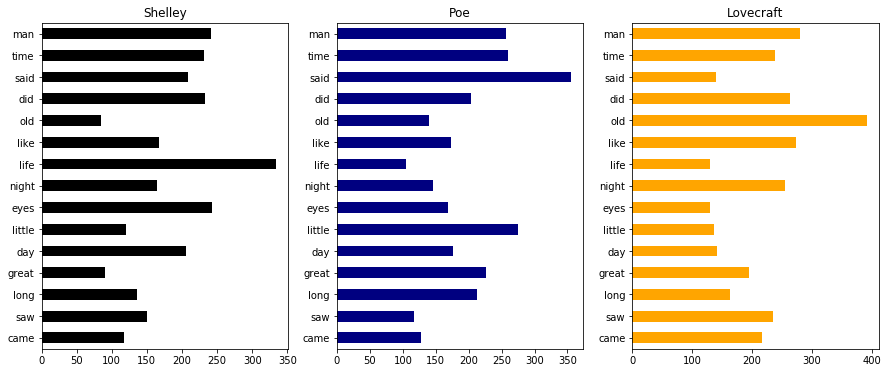

In [12]:
top_words = list(vect_df.sum().sort_values().tail(15).index)


fig , (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,6))

mws_df.loc[:, top_words].sum().plot.barh(ax=ax1, color='black')
eap_df.loc[:, top_words].sum().plot.barh(ax=ax2, color='navy')
hpl_df.loc[:, top_words].sum().plot.barh(ax=ax3, color='orange')

ax1.set_title('Shelley')
ax2.set_title('Poe')
ax3.set_title('Lovecraft');

###  Characters per sentence by author 

In [13]:
def get_len(author):
    return df.loc[df['author'] == author, 'text'].map(lambda x: len(x.split()))

In [14]:
def get_len(author):
    return df.loc[df['author'] == author, 'text'].map(lambda x: len(x.split()))

eplen = get_len('EAP')
mwlen = get_len('MWS')
hplen = get_len('HPL')

In [15]:
def get_char_len(author):
    return df.loc[df['author'] == author, 'text'].map(lambda x: len(x))

eplenchar = get_char_len('EAP')
mwlenchar = get_char_len('MWS')
hplenchar = get_char_len('HPL')

In [16]:
def get_word_len(author):
    return df.loc[df['author'] == author, 'text'].map(lambda x: len(x) / len(x.split()))

eplenword = get_word_len('EAP')
mwlenword = get_word_len('MWS')
hplenword = get_word_len('HPL')

### this is words per sentence

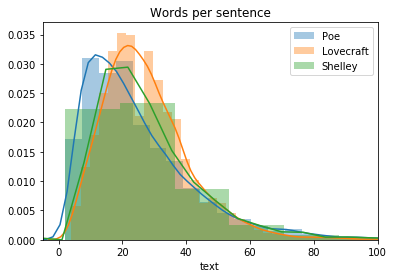

In [17]:
fig , ax = plt.subplots()

sns.distplot(eplen, label = 'Poe')
sns.distplot(hplen, label = 'Lovecraft')
sns.distplot(mwlen, label = 'Shelley')
ax.set_xbound(-5,100)
ax.legend()
ax.set_title('Words per sentence');

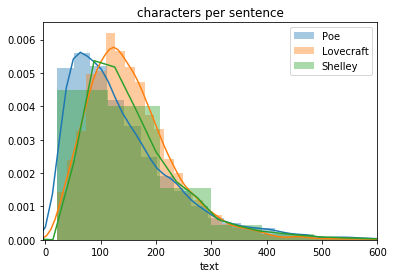

In [18]:
fig , ax = plt.subplots()

sns.distplot(eplenchar, label = 'Poe')
sns.distplot(hplenchar, label = 'Lovecraft')
sns.distplot(mwlenchar, label = 'Shelley')
ax.set_xbound(-5,600)
ax.legend()
ax.set_title('characters per sentence');

### Average word length doesn't differ 

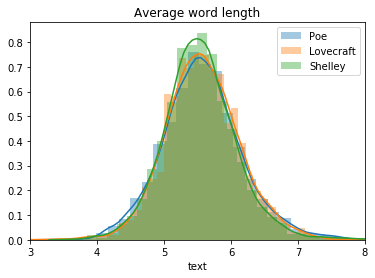

In [19]:
fig , ax = plt.subplots()

sns.distplot(eplenword, label = 'Poe')
sns.distplot(hplenword, label = 'Lovecraft')
sns.distplot(mwlenword, label = 'Shelley')
ax.set_xbound(3,8)
ax.legend()
ax.set_title('Average word length');